In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1525]:
train = pd.read_csv("/srv/jupyter/jodahr/HousePrices/train.csv")
test = pd.read_csv("/srv/jupyter/jodahr/HousePrices/train.csv")

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


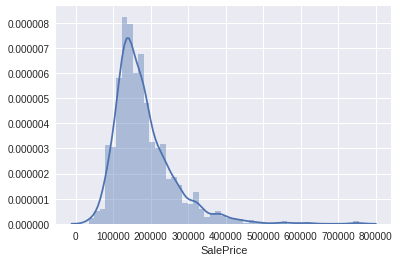

In [10]:
%matplotlib inline
sns.distplot(train.SalePrice, kde=True)

In [12]:
train.select_dtypes(include=[object]).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
nullPercentage = train.isnull().sum(axis=0) / len(train) * 100

In [2236]:
hmm = nullPercentage.loc[nullPercentage > 0]

In [2237]:
hmm.index.tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [22]:
train.select_dtypes(include=[object]).nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

0       Y
1       Y
2       Y
3       Y
4       Y
5       Y
6       Y
7       Y
8       Y
9       Y
10      Y
11      Y
12      Y
13      Y
14      Y
15      Y
16      Y
17      Y
18      Y
19      Y
20      Y
21      Y
22      Y
23      Y
24      Y
25      Y
26      Y
27      Y
28      Y
29      N
       ..
1430    Y
1431    Y
1432    Y
1433    Y
1434    Y
1435    Y
1436    Y
1437    Y
1438    Y
1439    Y
1440    Y
1441    Y
1442    Y
1443    N
1444    Y
1445    Y
1446    Y
1447    Y
1448    N
1449    Y
1450    Y
1451    Y
1452    Y
1453    Y
1454    Y
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

AttributeError: 'AxesSubplot' object has no attribute 'fig'

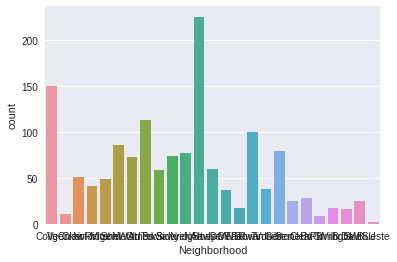

In [34]:
fig = sns.countplot(train.Neighborhood)
plt.figure(figsize=(45,10))
fig.fig.set_size_inches(11.7, 8.27)
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)

### Class to treat categorical variables

In [35]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
extractedDF = train.loc[:,['Neighborhood', 'SalePrice']]
extractedDF

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
4,NoRidge,250000
5,Mitchel,143000
6,Somerst,307000
7,NWAmes,200000
8,OldTown,129900
9,BrkSide,118000


In [47]:
extractedDF.isnull().any()

Neighborhood    False
SalePrice       False
dtype: bool

In [59]:
extractedDF.groupby('Neighborhood').agg('mean')

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [53]:
extractedDF.mean()

SalePrice    180921.19589
dtype: float64

In [477]:
class HighCardinality_Scheme(TransformerMixin, BaseEstimator):
    '''A transformation for categorical variables with high cardinality based on the paper
    "A Preprocessing Scheme for High-Cardinality Categorical Attributes in Classification and Prediction Problems" by Daniele Micci-Barreca'''
    
    def __init__(self, col, f=1,  copy=True):
        self.copy = copy
        self.lookup_table = None
        self.posterior = None
        self.prior = None
        self.col = col
        #self.weight = None
        self.ni = None
        self.f = f
        #self.target_type = target_type
    
    def fit(self, X, y):
        # join X and y 
        df = X.join(pd.DataFrame(y))
        
        # compute posterior and prior probabilities
        self.posterior = df.groupby(self.col).agg('mean')
        self.prior = y.mean()
        
        # compute counts per class i
        self.ni = df.groupby(self.col).agg('count')[y.to_frame().columns.tolist()[0]]
        
        # create a lookup table with posterior and weight column
        self.lookup_table = pd.concat([self.posterior, self.ni], axis=1)
        
        # extract the targetname for renaming columns
        targetName = y.to_frame().columns.tolist()[0]
        
        # rename columns of lookup table
        self.lookup_table.columns = [self.col + targetName + '_posterior', self.col + targetName + '_count']
        
        # add weight column to lookup_table
        self.lookup_table.loc[:,self.col + '_weight'] = self.weight_function(
            self.lookup_table[self.col + targetName + '_count'],self.ni.median(), self.f)
        
        # add transformation result S_i(X_i) as a column to the lookup_table
        self.lookup_table.loc[:,self.col + '_S'] = self.S(self.lookup_table[self.col + '_weight'],self.lookup_table[self.col + targetName + '_posterior'], self.prior)
        
        # return the instance of the class including the fitted values
        return self
        
    def transform(self, X):
        # join the S-column of the lookup table to the feature dataframe
        #X_trafo = self.lookup_table.loc[:,self.col + '_S'].to_frame().merge(X[self.col].to_frame(),
        #                                                                    left_index=True, right_on=self.col)
        X_trafo = self.lookup_table.loc[:,self.col + '_S'].to_frame().merge(X,
                                                                            left_index=True, right_on=self.col)
        
        # drop the categorical column
        X_trafo.drop(self.col, axis=1, inplace=True)
        # return the DF
        return X_trafo 
        
        
    def weight_function(self, n, k, f):
        '''weight function'''
        # set default f to 1 and k to mean of class, so ni
        return 1.0/(1 + np.exp(-(n-k)/f))
    
    def S(self, weight, posterior, prior):
        # complete transformation
        return weight * posterior + (1-weight) * prior

In [505]:
test = HighCardinality_Scheme('Neighborhood', f=1000)

In [506]:
test.ni

In [507]:
test.ni.median()

AttributeError: 'NoneType' object has no attribute 'median'

In [508]:
test.__doc__

'A transformation for categorical variables with high cardinality based on the paper\n    "A Preprocessing Scheme for High-Cardinality Categorical Attributes in Classification and Prediction Problems" by Daniele Micci-Barreca'

In [509]:
X.columns = ['a', 'b']

In [510]:
X.head()

,a,b
0,CollgCr,Pave
1,Veenker,Pave
2,CollgCr,Pave
3,Crawfor,Pave
4,NoRidge,Pave


In [511]:
X = train[['Neighborhood', 'Street']]

In [512]:
y = extractedDF.SalePrice

In [513]:
y_bin = np.where(train.CentralAir == 'Y', 1, 0)

In [514]:
y_bin_df = pd.DataFrame(y_bin, columns=['CentrailAir'])

In [515]:
y_bin_df.head()

,CentrailAir
0,1
1,1
2,1
3,1
4,1


In [516]:
test.fit(X,y_bin_df.CentrailAir)

HighCardinality_Scheme(col='Neighborhood', copy=True, f=1000)

In [517]:
test.transform(X).head()

,Neighborhood_S,Street
219,0.966945,Pave
229,0.966945,Pave
385,0.966945,Pave
443,0.966945,Pave
465,0.966945,Pave


In [518]:
test.posterior.head()

,CentrailAir
Neighborhood,
Blmngtn,1.000000
Blueste,1.000000
BrDale,1.000000
BrkSide,0.793103
ClearCr,1.000000


In [389]:
test.prior

0.934931506849315

In [390]:
test.posterior.merge(X, left_index=True, right_on='Neighborhood').head()

,CentrailAir,Neighborhood,Street
219,1.0,Blmngtn,Pave
229,1.0,Blmngtn,Pave
385,1.0,Blmngtn,Pave
443,1.0,Blmngtn,Pave
465,1.0,Blmngtn,Pave


In [521]:
pd.DataFrame(y).head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [519]:
X.join(y).groupby('Neighborhood').mean().head()

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571


In [2054]:
class HighCardinality(TransformerMixin, BaseEstimator):
    '''A transformation for categorical variables with high cardinality based on the paper
    "A Preprocessing Scheme for High-Cardinality Categorical Attributes in Classification and Prediction Problems" by Daniele Micci-Barreca.
    
    So fat, y has to be a pandas series and X needs to be a pandas Dataframe.
    
    You should use assuption='mean' for binarylabel and median for cont labels to take care of outliers
    
    '''
    
    def __init__(self, cols=None, assumption = 'median', f=1,  copy=True):
        self.copy = copy
        self.lookup_table = {}
        self.posterior = {}
        self.prior = None 
        self.ni = {}
        self.f = f
        self.assumption = assumption
        self.values = {}
        self.cols = cols
    
    def fit(self, X, y):
        # join X and y 
        df = X.join(pd.DataFrame(y))
        df.fillna('NaN', axis=1, inplace=True)
        
        if self.cols == None:
            self.cols = X.columns.tolist()
            
        for col in self.cols: 
            # compute posterior and prior probabilities
            if self.assumption == 'median':
                self.posterior[col] = df.groupby(col).agg('median')
                self.prior = y.median()
            else:
                self.posterior[col] = df.groupby(col).agg('mean')
                self.prior = y.mean()
                
        
            # compute counts per class i
            self.ni[col] = df.groupby(col).agg('count')[y.to_frame().columns.tolist()[0]]
        
            # create a lookup table with posterior and weight column
            self.lookup_table[col] = pd.concat([self.posterior[col], self.ni[col]], axis=1)
        
            # extract the targetname for renaming columns
            targetName = y.to_frame().columns.tolist()[0]
        
            # rename columns of lookup table
            self.lookup_table[col].columns = [col + '_posterior', col + '_count']
            self.values[col] = self.posterior[col].index.tolist()
            
            ## add dummy index row to lookup_table for values which do not appear in test data
            ## and if no np.nan appears in training
            if 'NaN' not in self.values[col]:
                lookup_NaN = pd.DataFrame({col + '_posterior':0, col + '_count':0}, index=['NaN'])
                self.lookup_table[col] = self.lookup_table[col].append(lookup_NaN)
        
            # add weight column to lookup_table
            self.lookup_table[col].loc[:,col + '_weight'] = self.weight_function(
                self.lookup_table[col][col +  '_count'],self.ni[col].median(), self.f)
        
            # add transformation result S_i(X_i) as a column to the lookup_table
            self.lookup_table[col].loc[:,col + '_S'] = self.S(self.lookup_table[col][col +
                '_weight'],self.lookup_table[col][col + '_posterior'], self.prior)
        
   
        # return the instance of the class including the fitted values
        return self
        
    def transform(self, X):
        # create a copy
        X_ = X if not self.copy else X.copy()
        # fill nan values
        
        X_.fillna('NaN', axis=1, inplace=True)
        # iterate over all different columns, here keys
        #lookup = None
        
        for key in self.lookup_table:
            # values which appear in test dataset but not in training
            missing_in_training = list(set(X_[key].unique().tolist()) - set(self.values[key]))
            # fill these values with 'NaN'
            X_.loc[:,key] = X_.loc[:,key].apply(lambda x: 'NaN' if x in missing_in_training else x)
            # if no 'NaN' appears, drop the dummy NaN row in lookup Table
            if 'NaN' not in X_[key].unique().tolist():
                lookup = self.lookup_table[key].drop('NaN',axis=0)
            else:
            # join the S-column of the lookup table to the feature dataframe
                lookup = self.lookup_table[key]
            X_ = lookup.loc[:,key + '_S'].to_frame().merge(X_,left_index=True,
                                                                           right_on=key, how='inner')
            # drop the categorical column
            X_.drop(key, axis=1, inplace=True)
        # return the DF
        return X_
        
        
    def weight_function(self, n, k, f):
        '''weight function: small f leads to a hard threshold,
        large f to a soft threshold between the prior and posterior probability'''
        # set default f to 1 and k to mean of class, so ni
        #return 1
        return 1.0/(1 + np.exp(-(n-k)/f))
    
    def S(self, weight, posterior, prior):
        # complete transformation
        return weight * posterior + (1-weight) * prior

In [2055]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [2056]:
X.head()

,Neighborhood,Street
0,CollgCr,Pave
1,Veenker,Pave
2,CollgCr,Pave
3,Crawfor,Pave
4,NoRidge,Pave


In [2057]:
#test = HighCardinality(['Neighborhood','Street'], f=1000)

In [2058]:
#test.fit(X,y)

In [2059]:
#test.lookup_table['Neighborhood'].head()

In [2060]:
#for key in test.lookup_table:
#    print(key)

In [2061]:
#test.transform(X).head()

In [2161]:
X_train = pd.DataFrame({'a':['Hund','Katze','Katze', 'Vogel', 'Tiger'], 'b':['Marcel', 'Marcel', 'Tim', 'Tim', 'Tim']})
y_train = pd.Series([1,1,0,0,1], name='y')

In [2162]:
from pandas_pipeline_classes import DFDummyTransformer

In [2163]:
X_train

,a,b
0,Hund,Marcel
1,Katze,Marcel
2,Katze,Tim
3,Vogel,Tim
4,Tiger,Tim


In [2126]:
tra = DFDummyTransformer()

In [2127]:
tra.fit_transform(X_train)

,a=Hund,a=Katze,a=Tiger,a=Vogel
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [2137]:
tra.dv.vocabulary_

{'a=Hund': 0, 'a=Katze': 1, 'a=Tiger': 2, 'a=Vogel': 3}

In [2153]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [2154]:
mydict = {'a':['Hund','Katze','Katze', 'Vogel', 'Tiger']}

In [2164]:
X_train.to_dict('records')

[{'a': 'Hund', 'b': 'Marcel'},
 {'a': 'Katze', 'b': 'Marcel'},
 {'a': 'Katze', 'b': 'Tim'},
 {'a': 'Vogel', 'b': 'Tim'},
 {'a': 'Tiger', 'b': 'Tim'}]

In [2165]:
dv.fit(X_train.to_dict('records'))

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [2157]:
dv.vocabulary_

{'a=Hund': 0, 'a=Katze': 1, 'a=Tiger': 2, 'a=Vogel': 3}

In [2166]:
bla = dv.transform(X_train.to_dict('records'))
pd.DataFrame(bla)
bla

array([[ 1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  1.]])

In [2146]:
X_train.to_dict()

{'a': {0: 'Hund', 1: 'Katze', 2: 'Katze', 3: 'Vogel', 4: 'Tiger'}}

In [2129]:
X_test = pd.DataFrame({'a':['Hund','Katze', 'Vogel', 'Maus', 'Bulle']})
y_test = pd.Series([1,1,0,1,1], name='y')

In [2167]:
tra.transform(X_test)

,a=Hund,a=Katze,a=Tiger,a=Vogel
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
from pandas_pipeline_classes import DFDummyTransformer

In [2172]:
from pandas_pipeline_classes import DFScaler

In [2198]:
class DFScaler(TransformerMixin, BaseEstimator):
    '''Takes an sklearn scaler object, applies it and return a DF.'''
    def __init__(self, scaler, copy=True):
        self.scaler = scaler
        self.copy = copy
                                                                                                                                                                                              
    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        X_ = X if not self.copy else X.copy()
        columns = X_.columns.tolist()
        index = X_.index
        X_ = self.scaler.transform(X_)
        newColumns = [str(element) + '_scaled' for element in columns]
        Xs_df = pd.DataFrame(X_, index=index, columns=newColumns)
        return Xs_df

In [2215]:
class DFScaler(TransformerMixin, BaseEstimator):
    '''Takes an sklearn scaler object, applies it and return a DF.'''
    def __init__(self, scaler, copy=True):
        self.scaler = scaler
        self.copy = copy
                                                                                                                                                                                              
    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        X_ = X if not self.copy else X.copy()
        columns = X_.columns.tolist()
        index = X_.index
        X_ = self.scaler.transform(X_)
        newColumns = [str(element) + '_scaled' for element in columns]
        Xs_df = pd.DataFrame(X_, index=index, columns=newColumns)
        return Xs_df

In [2225]:
class DFImputer(TransformerMixin, BaseEstimator):
    def __init__(self, imputer, copy=True):
        self.copy = copy
        self.imputer = imputer

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):
        X_ = X if not self.copy else X.copy()
        columns = X_.columns.tolist()
        index = X_.index
        X_ = self.imputer.transform(X_)
        Ximp_df = pd.DataFrame(X_, index=index, columns=columns)
        return Ximp_df


In [2226]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer

In [2227]:
scaler = DFScaler(scaler=MinMaxScaler())
imputer = DFImputer(Imputer())

In [2228]:
toscaleDF = pd.DataFrame([5,np.nan,1,0,4])

In [2230]:
imputer.fit_transform(toscaleDF)

,0
0,5.0
1,2.5
2,1.0
3,0.0
4,4.0


In [2221]:
toscaleDF

,0
0,5.0
1,NaN
2,1.0
3,0.0
4,4.0


In [2213]:
scaler

DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1)))

In [2214]:
scaler.fit_transform(toscaleDF)

,0_scaled,1_scaled,2_scaled,3_scaled,4_scaled
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0


In [2174]:
scaler.__doc__

In [2103]:
test2 = HighCardinality()

In [2104]:
test2

HighCardinality(assumption='median', cols=None, copy=True, f=1)

In [2105]:
test2.fit(X_train, y_train)

HighCardinality(assumption='median', cols=['a'], copy=True, f=1)

In [2106]:
test2.lookup_table

{'a':        a_count  a_posterior  a_weight       a_S
 Hund         1          1.0  0.500000  0.750000
 Katze        2          0.5  0.731059  0.500000
 Vogel        1          0.0  0.500000  0.250000
 NaN          0          0.0  0.268941  0.365529}

In [2107]:
test2.values

{'a': ['Hund', 'Katze', 'Vogel']}

In [2108]:
test2.transform(X_test)

,a_S
0,0.750000
1,0.500000
2,0.250000
3,0.365529


In [2109]:
test2.transform(X_test)

,a_S
0,0.750000
1,0.500000
2,0.250000
3,0.365529


In [2097]:
#X_test['a'].unique().tolist()

In [2096]:
set(X_test['a'].unique().tolist()) - set(test2.posterior['a'].index.tolist())

KeyError: 'a'

In [2075]:
test2.lookup_table['a']

,a_count,a_posterior,a_weight,a_S
Hund,1,1.0,0.500000,0.750000
Katze,2,0.5,0.731059,0.500000
Vogel,1,0.0,0.500000,0.250000
NaN,0,0.0,0.268941,0.365529


In [2076]:
train_cat = train.select_dtypes(include=[object])
test_cat = test.select_dtypes(include=[object])

In [2077]:
X_train = train_cat
y_train = train.SalePrice

X_test = test_cat
y_test = test.SalePrice

In [2078]:
test3 = HighCardinality(cols=X_train.columns.tolist(), assumption='median',f=10)

In [2079]:
test3.fit(X_train, y_train)

HighCardinality(assumption='median',
        cols=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtC...ageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
        copy=True, f=10)

In [2082]:
#train[train]

In [2083]:
test3.ni['GarageFinish'].median()

387.0

In [2084]:
test3.prior

163000.0

In [2050]:
test3.lookup_table['GarageFinish']

,GarageFinish_posterior,GarageFinish_count,GarageFinish_weight,GarageFinish_S
GarageFinish,,,,
Fin,215000,352,2.931223e-02,164524.235999
NaN,100000,81,5.135572e-14,163000.000000
RFn,190000,422,9.706878e-01,189208.569770
Unf,135000,605,1.000000e+00,135000.000010


In [2051]:
test3.transform(X_test).describe()

,SaleCondition_S,SaleType_S,MiscFeature_S,Fence_S,PoolQC_S,PavedDrive_S,GarageCond_S,GarageQual_S,GarageFinish_S,GarageType_S,...,Condition1_S,Neighborhood_S,LandSlope_S,LotConfig_S,Utilities_S,LandContour_S,LotShape_S,Alley_S,Street_S,MSZoning_S
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000
mean,165263.055363,164896.290268,163558.197392,168078.267058,163162.338639,166443.643154,164884.008491,164535.770350,159340.101041,168079.228786,...,163795.225651,169859.435824,162463.745946,161247.909111,163000.0,163013.028947,160848.630135,164207.592581,163000.0,166277.499421
std,25372.584723,25250.836902,3990.389670,11337.938899,5979.277107,7590.509536,17191.418745,17714.267460,22603.785706,26973.859368,...,10076.945363,43663.786023,2677.156399,5252.998491,0.0,4977.680200,20071.010796,4326.401172,0.0,19368.514530
min,130565.093099,139525.150502,128500.000000,137451.416710,162900.000000,137000.000000,100172.113528,100421.649608,135000.000010,129500.000000,...,121816.072316,119072.987248,161875.000000,159697.500000,163000.0,147494.553081,146000.000000,141250.000000,163000.0,120500.009631
25%,160000.000000,158000.000000,164250.000000,173000.000000,162900.000000,168500.000000,170000.000000,170000.000000,135000.000010,129500.000000,...,166500.000000,140000.000523,161875.000000,159697.500000,163000.0,162900.000000,146000.000000,165000.000000,163000.0,174000.000000
50%,160000.000000,158000.000000,164250.000000,173000.000000,162900.000000,168500.000000,170000.000000,170000.000000,164524.235999,185000.000000,...,166500.000000,164096.640238,161875.000000,159697.500000,163000.0,162900.000000,146000.000000,165000.000000,163000.0,174000.000000
75%,160000.000000,158000.000000,164250.000000,173000.000000,162900.000000,168500.000000,170000.000000,170000.000000,189208.569770,185000.000000,...,166500.000000,183686.954315,161875.000000,160000.000137,163000.0,162900.000000,188999.999994,165000.000000,163000.0,174000.000000
max,244471.232910,247452.299568,204326.810689,173000.000000,322413.351350,168500.000000,170000.000000,170123.165699,189208.569770,206098.111305,...,181500.000000,306286.725263,174850.000000,181131.000000,163000.0,183322.130087,188999.999994,165745.979725,163000.0,184475.000000


In [1950]:
len(X_test)

1460

In [1951]:
X_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [1842]:
X_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [2052]:
from sklearn.pipeline import Pipeline

In [2053]:
cat_pipe = Pipeline([
    ('cat', HighCardinality())
])

TypeError: __init__() missing 1 required positional argument: 'cols'

In [2241]:
myhigh=HighCardinality()

myhigh.fit_transform(train.Neighborhood.to_frame(), train.SalePrice).join(train.Neighborhood.to_frame())

,Neighborhood_S,Neighborhood
219,163000.000000,Blmngtn
229,163000.000000,Blmngtn
385,163000.000000,Blmngtn
443,163000.000000,Blmngtn
465,163000.000000,Blmngtn
559,163000.000000,Blmngtn
597,163000.000000,Blmngtn
639,163000.000000,Blmngtn
790,163000.000000,Blmngtn
851,163000.000000,Blmngtn
